In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/data_prepos2.xlsx')
df

,content
0,coba meta usaha saing twitter microblogging ap...
1,overall bagus fitur terjemah twitter
2,sayang multi akun instagram
3,bagus fitur twit
4,twtr suka pasti bagus belum translate
...,...
1920,bug bertambah postingan saja
1921,aplikasi mati instagram facebook fiturnya
1922,masuk tulis izin
1923,akun instagram connect login aplikasi threads ...


In [ ]:
# Create several functions for the preprocessing stage,
# starting from CaseFolding, Tokenization, Filtering and Steming to normalization
import string
import re
def filteringText(content):
    content = re.sub(r'@[A-Za-z0-9]+', '', content)
    content = re.sub(r'#[A-Za-z0-9]+', '', content)
    content = re.sub(r'RT[\s]', '', content)
    content = re.sub(r"http\S+", '', content)
    content = re.sub(r'[0-9]+', '', content)
    content = re.sub(r'(.)\1+',r'\1\1', content)
    content = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',content)
    content = re.sub(r'[^a-zA-Z]',' ', content)
    content = re.sub(r'\b(\w+)( \1\b)+', r'\1', content)
    content = content.replace('\n', ' ')
    content = content.translate(str.maketrans('', '', string.punctuation))
    content = content.strip(' ')
    return content

def casefoldingText(content):
    content = content.lower()
    return content

from nltk.tokenize import word_tokenize
def tokenizingText(content):
    content = word_tokenize(content)
    return content

data_slang = pd.read_csv('colloquial-indonesian-lexicon.csv')
def replace_slang(content):
    res = ''
    for item in content.split():
        if item in data_slang.slang.values:
            res += data_slang[data_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

from nltk.corpus import stopwords
def stopwords_removal(content):
    filtering = stopwords.words('indonesian','english')
    x=[]
    data=[]
    def myFunc(x):

        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, content)
    for x in fit:
        data.append(x)
    return data


def stemming(content) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in content:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

#Displays the results of the pre-processing process

In [ ]:
#Case Folding
df['preprocessing'] = df['content'].apply(casefoldingText)
df.to_csv('casefoldingText.csv')
df[['content', 'preprocessing']]

,content,preprocessing
0,coba meta usaha saing twitter microblogging ap...,coba meta usaha saing twitter microblogging ap...
1,overall bagus fitur terjemah twitter,overall bagus fitur terjemah twitter
2,sayang multi akun instagram,sayang multi akun instagram
3,bagus fitur twit,bagus fitur twit
4,twtr suka pasti bagus belum translate,twtr suka pasti bagus belum translate
...,...,...
1920,bug bertambah postingan saja,bug bertambah postingan saja
1921,aplikasi mati instagram facebook fiturnya,aplikasi mati instagram facebook fiturnya
1922,masuk tulis izin,masuk tulis izin
1923,akun instagram connect login aplikasi threads ...,akun instagram connect login aplikasi threads ...


In [ ]:
#slangword
df['preprocessing'] = df['preprocessing'].apply(replace_slang)
df.to_csv('replace_slang.csv')
df[['content', 'preprocessing']]

,content,preprocessing
0,coba meta usaha saing twitter microblogging ap...,coba meta usaha saing twitter microblogging ap...
1,overall bagus fitur terjemah twitter,overall bagus fitur terjemah twitter
2,sayang multi akun instagram,sayang multi akun instagram
3,bagus fitur twit,bagus fitur twit
4,twtr suka pasti bagus belum translate,twtr suka pasti bagus belum translate
...,...,...
1920,bug bertambah postingan saja,bug bertambah postingan saja
1921,aplikasi mati instagram facebook fiturnya,aplikasi mati instagram facebook fiturnya
1922,masuk tulis izin,masuk tulis izin
1923,akun instagram connect login aplikasi threads ...,akun instagram connect login aplikasi threads ...


In [ ]:
#filtering
df['preprocessing'] = df['preprocessing'].apply(filteringText)
df.to_csv('filteringText.csv')
df[['content', 'preprocessing']]

,content,preprocessing
0,coba meta usaha saing twitter microblogging ap...,coba meta usaha saing twitter microblogging ap...
1,overall bagus fitur terjemah twitter,overall bagus fitur terjemah twitter
2,sayang multi akun instagram,sayang multi akun instagram
3,bagus fitur twit,bagus fitur twit
4,twtr suka pasti bagus belum translate,twtr suka pasti bagus belum translate
...,...,...
1920,bug bertambah postingan saja,bug bertambah postingan saja
1921,aplikasi mati instagram facebook fiturnya,aplikasi mati instagram facebook fiturnya
1922,masuk tulis izin,masuk tulis izin
1923,akun instagram connect login aplikasi threads ...,akun instagram connect login aplikasi threads ...


In [ ]:
#token
import nltk
nltk.download('punkt')
df['preprocessing'] = df['preprocessing'].apply(tokenizingText)
df.to_csv('tokenizingText.csv')
df[['content', 'preprocessing']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,preprocessing
0,coba meta usaha saing twitter microblogging ap...,"[coba, meta, usaha, saing, twitter, microblogg..."
1,overall bagus fitur terjemah twitter,"[overall, bagus, fitur, terjemah, twitter]"
2,sayang multi akun instagram,"[sayang, multi, akun, instagram]"
3,bagus fitur twit,"[bagus, fitur, twit]"
4,twtr suka pasti bagus belum translate,"[twtr, suka, pasti, bagus, belum, translate]"
...,...,...
1920,bug bertambah postingan saja,"[bug, bertambah, postingan, saja]"
1921,aplikasi mati instagram facebook fiturnya,"[aplikasi, mati, instagram, facebook, fiturnya]"
1922,masuk tulis izin,"[masuk, tulis, izin]"
1923,akun instagram connect login aplikasi threads ...,"[akun, instagram, connect, login, aplikasi, th..."


In [ ]:
#Stopword Removal
import nltk
nltk.download('stopwords')
df['preprocessing'] = df['preprocessing'].apply(stopwords_removal)
df.to_csv('stopwords_removal.csv')
df[['content', 'preprocessing']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,preprocessing
0,coba meta usaha saing twitter microblogging ap...,"[coba, meta, usaha, saing, twitter, microblogg..."
1,overall bagus fitur terjemah twitter,"[overall, bagus, fitur, terjemah, twitter]"
2,sayang multi akun instagram,"[sayang, multi, akun, instagram]"
3,bagus fitur twit,"[bagus, fitur, twit]"
4,twtr suka pasti bagus belum translate,"[twtr, suka, bagus, translate]"
...,...,...
1920,bug bertambah postingan saja,"[bug, bertambah, postingan]"
1921,aplikasi mati instagram facebook fiturnya,"[aplikasi, mati, instagram, facebook, fiturnya]"
1922,masuk tulis izin,"[masuk, tulis, izin]"
1923,akun instagram connect login aplikasi threads ...,"[akun, instagram, connect, login, aplikasi, th..."


In [ ]:
#stemming
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
df['stemming_content'] = df['preprocessing'].apply(stemming)
df.to_csv('stemming.csv')
df[['preprocessing', 'stemming_content']]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
coba meta usaha saing twitter microblogging app review singkat spesial mudah hubung instagram app
overall bagus fitur terjemah twitter
sayang multi akun instagram
bagus fitur twit
twtr suka bagus translate
aplikasi pas upload photo mental
orang ulas threads android terima kasih instagram meta alternatif pilih bagus twitter limit
fiturnya sesimple nama
fiturnya bilang minim tampil bagus ringan harap fitur tagar maksimal
elegan nyaman aplikasi enteng mudah paham
terima kasih tolong batasin konten negatif biar kayak twitter threads komunitas positif salamrispek
tolong mentraslite postingan akun
mudah aplikasi
haloo erortapi notif muncul
please pakai option not autoplay the video
hastag tagar berita viral threads
aman bug enak pakai tolong ada fitur translate min awam bahasa gua indonesia english
deh bagus cuman bagus support kirim file bantu banget illustrator pasarin gambar
lancar samsung galaxy chipset hio

,preprocessing,stemming_content
0,"[coba, meta, usaha, saing, twitter, microblogg...",coba meta usaha saing twitter microblogging ap...
1,"[overall, bagus, fitur, terjemah, twitter]",overall bagus fitur terjemah twitter
2,"[sayang, multi, akun, instagram]",sayang multi akun instagram
3,"[bagus, fitur, twit]",bagus fitur twit
4,"[twtr, suka, bagus, translate]",twtr suka bagus translate
...,...,...
1920,"[bug, bertambah, postingan]",bug tambah postingan
1921,"[aplikasi, mati, instagram, facebook, fiturnya]",aplikasi mati instagram facebook fiturnya
1922,"[masuk, tulis, izin]",masuk tulis izin
1923,"[akun, instagram, connect, login, aplikasi, th...",akun instagram connect login aplikasi threads ...


#Labeling with Inset Lexicon

In [ ]:
lexicon_positive = pd.read_csv('/content/lexicon_positive_ver1.csv')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_csv('/content/lexicon_negative_ver1.csv')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(ulasan):
    score = 0
    for word in ulasan:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in ulasan:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positif'
    elif (score < 0):
        sentimen = 'negatif'
    else:
        sentimen = 'netral'
    return score, sentimen

results = df['preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['label'] = results[0]
#data['sentimen'] = results[1]
#data

df['label'] = results[1]
dataSentimen = df
data_inset = df

data_inset[['content', 'preprocessing', 'label']]

,content,preprocessing,label
0,coba meta usaha saing twitter microblogging ap...,"[coba, meta, usaha, saing, twitter, microblogg...",netral
1,overall bagus fitur terjemah twitter,"[overall, bagus, fitur, terjemah, twitter]",negatif
2,sayang multi akun instagram,"[sayang, multi, akun, instagram]",netral
3,bagus fitur twit,"[bagus, fitur, twit]",negatif
4,twtr suka pasti bagus belum translate,"[twtr, suka, bagus, translate]",netral
...,...,...,...
1920,bug bertambah postingan saja,"[bug, bertambah, postingan]",negatif
1921,aplikasi mati instagram facebook fiturnya,"[aplikasi, mati, instagram, facebook, fiturnya]",negatif
1922,masuk tulis izin,"[masuk, tulis, izin]",negatif
1923,akun instagram connect login aplikasi threads ...,"[akun, instagram, connect, login, aplikasi, th...",negatif


In [ ]:
df['label'].value_counts()

negatif    1225
positif     440
netral      260
Name: label, dtype: int64

In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
df = df.replace('',np.nan, regex=True)
df = df.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
df = df.reset_index(drop=True)

In [ ]:
df['label'].value_counts()

negatif    1225
positif     440
netral      260
Name: label, dtype: int64

In [ ]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
df = df.drop(df[df['label'] == 'netral'].index)
df = df.reset_index(drop=True)
df

,content,preprocessing,stemming_content,label
0,overall bagus fitur terjemah twitter,"[overall, bagus, fitur, terjemah, twitter]",overall bagus fitur terjemah twitter,negatif
1,bagus fitur twit,"[bagus, fitur, twit]",bagus fitur twit,negatif
2,aplikasi pas upload photo mental,"[aplikasi, pas, upload, photo, mental]",aplikasi pas upload photo mental,negatif
3,orang ulas threads android terima kasih instag...,"[orang, ulas, threads, android, terima, kasih,...",orang ulas threads android terima kasih instag...,negatif
4,fiturnya bilang minim tampil sudah bagus ringa...,"[fiturnya, bilang, minim, tampil, bagus, ringa...",fiturnya bilang minim tampil bagus ringan hara...,negatif
...,...,...,...,...
1660,iphone gal bikin thread mulu,"[iphone, gal, bikin, thread, mulu]",iphone gal bikin thread mulu,positif
1661,bug bertambah postingan saja,"[bug, bertambah, postingan]",bug tambah postingan,negatif
1662,aplikasi mati instagram facebook fiturnya,"[aplikasi, mati, instagram, facebook, fiturnya]",aplikasi mati instagram facebook fiturnya,negatif
1663,masuk tulis izin,"[masuk, tulis, izin]",masuk tulis izin,negatif


<Axes: ylabel='label'>

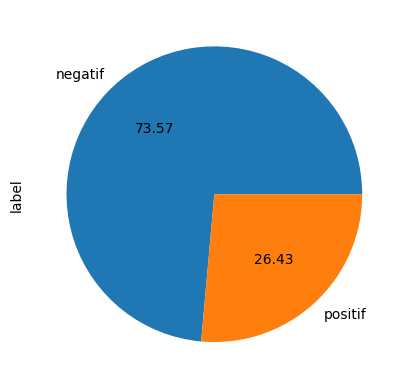

In [ ]:
df['label'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data = df[['stemming_content', 'label']]
data

,stemming_content,label
0,overall bagus fitur terjemah twitter,negatif
1,bagus fitur twit,negatif
2,aplikasi pas upload photo mental,negatif
3,orang ulas threads android terima kasih instag...,negatif
4,fiturnya bilang minim tampil bagus ringan hara...,negatif
...,...,...
1660,iphone gal bikin thread mulu,positif
1661,bug tambah postingan,negatif
1662,aplikasi mati instagram facebook fiturnya,negatif
1663,masuk tulis izin,negatif


In [ ]:
data.to_csv('hasil_labelling.csv', index = False)

In [ ]:
data = pd.read_csv('hasil_labelling.csv')
data.head()

,stemming_content,label
0,overall bagus fitur terjemah twitter,negatif
1,bagus fitur twit,negatif
2,aplikasi pas upload photo mental,negatif
3,orang ulas threads android terima kasih instag...,negatif
4,fiturnya bilang minim tampil bagus ringan hara...,negatif


In [ ]:
data.replace(to_replace='negatif', value=0, inplace=True)
data.replace(to_replace='positif', value=1, inplace=True)
data.replace(to_replace='netral', value=2, inplace=True)
data.head()

,stemming_content,label
0,overall bagus fitur terjemah twitter,0
1,bagus fitur twit,0
2,aplikasi pas upload photo mental,0
3,orang ulas threads android terima kasih instag...,0
4,fiturnya bilang minim tampil bagus ringan hara...,0


#Split Data

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (1332, 2)
Validation data shape: (166, 2)
Test data shape: (167, 2)


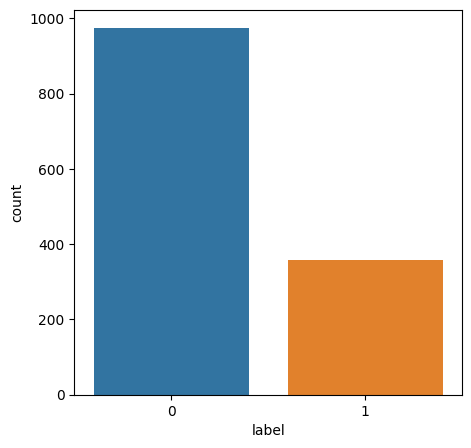

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

In [ ]:
df_train.to_csv('data_training.csv', index = False)

In [ ]:
data = pd.read_csv('data_training.csv')
data.head()

,stemming_content,label
0,tolong adakan fitur aplikasi,0
1,saran tambah fitur cari translate enak pakai t...,1
2,seru tambah fitur biar enak mutualan,0
3,balas komentar idol,0
4,komen foto langsung force close,1


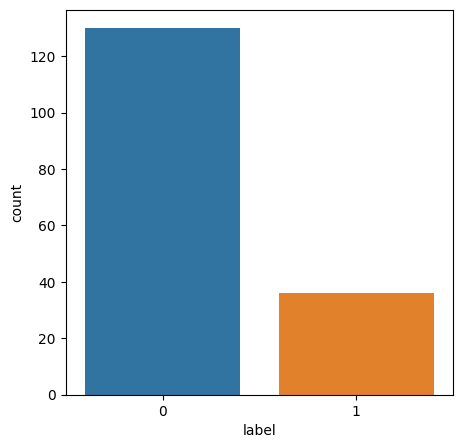

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

In [ ]:
df_val.to_csv('data_validasi.csv', index = False)

In [ ]:
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_content,label
0,bagus banget sayang topic trending search munc...,0
1,login pas login valid,1
2,dasar apk bodoh hack masuk awas,0
3,bagus fitur translate,0
4,apknya workit followers tambah apk rekomendasi...,0


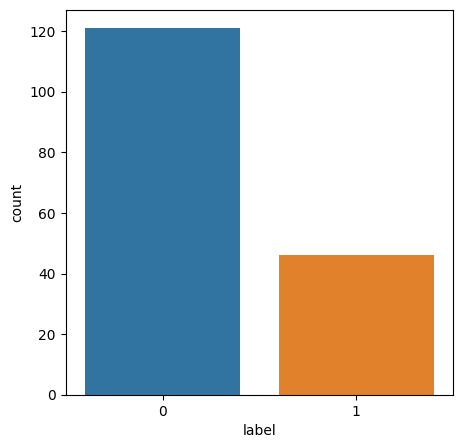

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
df_test.to_csv('data_testing.csv', index = False)

In [ ]:
data = pd.read_csv('data_testing.csv')
data.head()

,stemming_content,label
0,terjemah threads berita negeri,0
1,aplikasi temu bug thread pindah kursor tulis g...,0
2,translate terimakasih,1
3,aplikasi bagus etik character,0
4,bagus suka daftar orang cari topik minat cari ...,0


IndoBERT Model

In [ ]:
#Modelling
!pip install transformers

In [ ]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))
print(vocabulary)

Panjang vocabulary: 30521
{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '#

In [ ]:
# Example of Tokenization
# Retrieve the 1st index data on the dataframe
print('Kalimat:', df['stemming_content'][1])
print('BERT Tokenizer:', bert_tokenizer.tokenize(df['stemming_content'][1]))

Kalimat: bagus fitur twit
BERT Tokenizer: ['bagus', 'fitur', 'tw', '##it']


In [ ]:
# Example of input formatting for BERT.
# Input formatting can use 'encode_plus' function
bert_input = bert_tokenizer.encode_plus(
    # Sample sentences
    df['stemming_content'][1],
    # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
    add_special_tokens = True,
    # Add padding to max_length using [PAD] token
    # jika kalimat kurang dari max_length
    padding = 'max_length',
    # Truncate if sentence is more than max_length
    truncation = 'longest_first',
    # Determine the max_length of the entire sentence
    max_length = 50,
    # Returns the attention mask value
    return_attention_mask = True,
    # Returns the value of token type id (segment embedding)
    return_token_type_ids =True)
# The function 'encode_plus' returns 3 values:
# input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# Original data
print('Kalimat\t\t:', df['stemming_content'][1]) #1 denotes first order data or first review data
                                                   # so for example I change it to 1000 still 1 data appears but the order is 1000th
# Input formatting + tokenizer return
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# Input IDs: token indexes in the tokenizer vocabulary
print('Input IDs\t:', bert_input['input_ids'])
# Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
print('Token Type IDs\t:', bert_input['token_type_ids'])
# Attention mask : returns value [0,1].
#1 means masked token, 0 tokens are not masked (ignored)
print('Attention Mask\t:', bert_input['attention_mask'])

Kalimat		: bagus fitur twit
Tokenizer	: ['[CLS]', 'bagus', 'fitur', 'tw', '##it', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 1305, 2631, 2943, 47, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


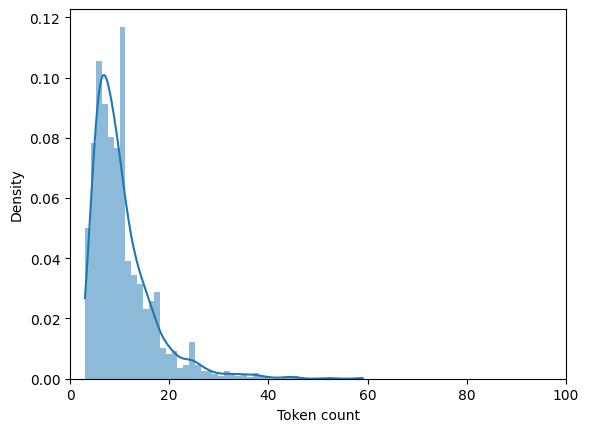

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# There are many ways to define max_length
# The intuition is that we don't want to cut sentences
# Or added too much padding (longer computation)

# In this example, max_length is determined from the distribution of tokens in the dataset
token_lens = []
for txt in df['stemming_content']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Create a function to combine tokenization steps
# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [ ]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=5,
                              batch_size=32, validation_data=val_encoded)

Epoch 1/5
42/42 [==============================] - 772s 17s/step - loss: 0.5970 - accuracy: 0.7200 - val_loss: 0.4071 - val_accuracy: 0.8253
Epoch 2/5
42/42 [==============================] - 725s 17s/step - loss: 0.3839 - accuracy: 0.8183 - val_loss: 0.2645 - val_accuracy: 0.9157
Epoch 3/5
42/42 [==============================] - 715s 17s/step - loss: 0.2282 - accuracy: 0.9099 - val_loss: 0.2562 - val_accuracy: 0.9217
Epoch 4/5
42/42 [==============================] - 714s 17s/step - loss: 0.1671 - accuracy: 0.9422 - val_loss: 0.2756 - val_accuracy: 0.8976
Epoch 5/5
42/42 [==============================] - 715s 17s/step - loss: 0.0559 - accuracy: 0.9865 - val_loss: 0.2447 - val_accuracy: 0.9277
CPU times: user 1h 35min 31s, sys: 3min 15s, total: 1h 38min 46s
Wall time: 1h 1min 8s


In [ ]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

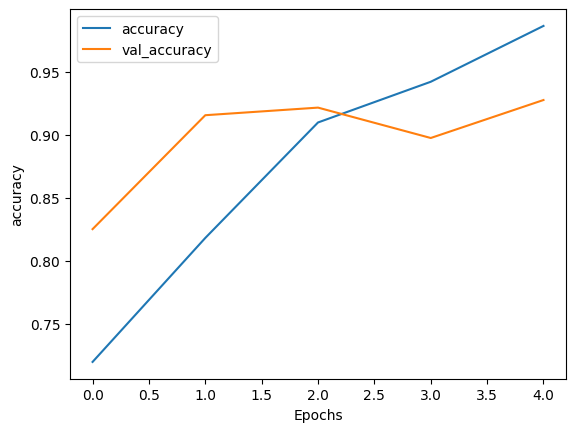

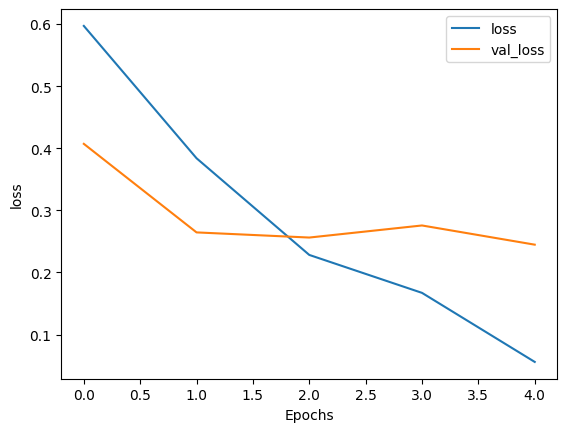

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(5):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i],
                                                            bert_history.history['loss'][i],
                                                            bert_history.history['val_accuracy'][i],
                                                            bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.719970 	   0.596975 	   0.825301 	   0.407075
       2   0.818318 	   0.383863 	   0.915663 	   0.264467
       3   0.909910 	   0.228192 	   0.921687 	   0.256178
       4   0.942192 	   0.167097 	   0.897590 	   0.275631
       5   0.986486 	   0.055891 	   0.927711 	   0.244714


In [ ]:
bert_model.save_weights('bert-model.h5')

In [ ]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

6/6 [==============================] - 25s 4s/step - loss: 0.5111 - accuracy: 0.8503
Test Accuracy: 0.8502994179725647
CPU times: user 40.6 s, sys: 220 ms, total: 40.9 s
Wall time: 41 s


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

6/6 [==============================] - 29s 4s/step


In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8502994011976048

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6521739130434783

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.7692307692307693

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7058823529411764

In [ ]:
confusion_matrix(y_true, y_pred)

array([[112,   9],
       [ 16,  30]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.77      0.65      0.71        46

    accuracy                           0.85       167
   macro avg       0.82      0.79      0.80       167
weighted avg       0.85      0.85      0.85       167



In [ ]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)
bert_load_model.load_weights('bert-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Sample text
input_text = 'overall bagus fitur terjemah twitter'
# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

sentiment_labels = ['negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

print(input_text, ':',
      sentiment_labels[label[0]])

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


overall bagus fitur terjemah twitter : negatif


In [ ]:
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

In [ ]:
sentiment_labels = ['negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [ ]:
print(input_text, ':', sentiment_labels[label[0]])

overall bagus fitur terjemah twitter : negatif


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


#Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual labels')

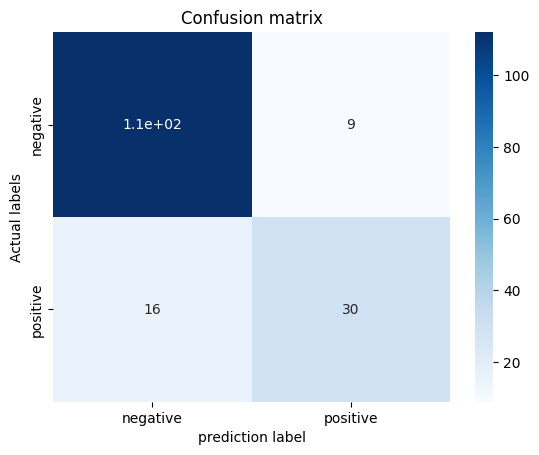

In [ ]:
import seaborn as sn
from pandas import DataFrame
confm = confusion_matrix(y_true, y_pred)
columns = ['negative','positive']
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('prediction label')
ax.set_ylabel('Actual labels')

In [ ]:
matrix = confusion_matrix(y_true, y_pred)
matrix

array([[112,   9],
       [ 16,  30]])

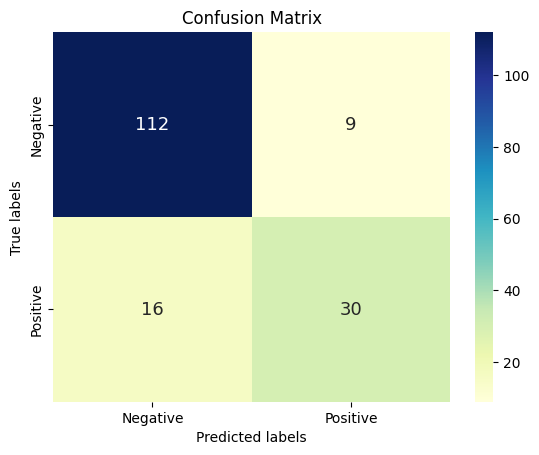

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#WordCloud

In [ ]:
df_GROUPBY_label = df.groupby("label", sort=False)
df_GROUPBY_label.get_group('positif')
owen = df_GROUPBY_label[['stemming_content','label']].get_group('positif')
owen.to_csv('positif.csv')

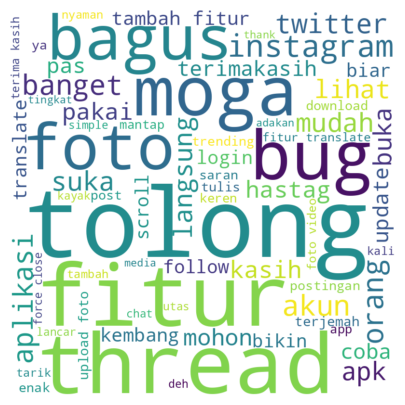

In [ ]:
positif = pd.read_csv('positif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  positif['stemming_content']])
wordCloud = WordCloud(colormap="viridis",background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_GROUPBY_label = df.groupby("label", sort=False)
df_GROUPBY_label.get_group('negatif')
owen = df_GROUPBY_label[['stemming_content','label']].get_group('negatif')
owen.to_csv('negatif.csv')

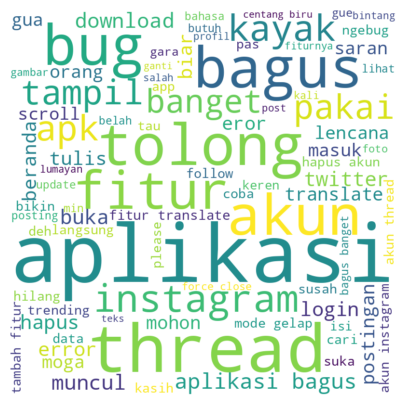

In [ ]:
negatif = pd.read_csv('negatif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  negatif['stemming_content']])
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()